In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
# Load dataset
file_path = "D:/RITHIK/Project/Project_phase/linkedin_jobs_analysis.csv"
df = pd.read_csv(file_path)

In [25]:
# Preview data
print(df.head())

              title  company                          location  \
0  Python Developer  Infosys  Bengaluru East, Karnataka, India   
1  Python Developer  Infosys  Bengaluru East, Karnataka, India   
2  Python developer  Infosys  Bengaluru East, Karnataka, India   
3  Python Developer  Infosys  Bengaluru East, Karnataka, India   
4  Python Developer  Infosys          Pune, Maharashtra, India   

                                                link         salary  \
0  https://in.linkedin.com/jobs/view/python-devel...  Not specified   
1  https://in.linkedin.com/jobs/view/python-devel...  Not specified   
2  https://in.linkedin.com/jobs/view/python-devel...  Not specified   
3  https://in.linkedin.com/jobs/view/python-devel...  Not specified   
4  https://in.linkedin.com/jobs/view/python-devel...  Not specified   

        job_type  time_posted      skills              category scraped_date  \
0  Not specified  2 weeks ago  python, go  software_development   2025-08-20   
1  Not specified

In [26]:
# 1. Clean and parse skills
# -----------------------------
# Assuming skills are stored as comma-separated values in a column named 'skills'
df['skills'] = df['skills'].fillna('').str.lower()
df['skills_list'] = df['skills'].apply(lambda x: [s.strip() for s in x.split(',') if s.strip() != ''])

In [27]:
# Explode skills into rows
skills_df = df.explode('skills_list')


In [28]:
# 2. Skill Frequency by City
# -----------------------------
top_skills_by_city = (
    skills_df.groupby(['location', 'skills_list'])
    .size()
    .reset_index(name='count')
)

# Top 10 skills per city
top_skills_by_city = (
    top_skills_by_city.sort_values(['location', 'count'], ascending=[True, False])
    .groupby('location')
    .head(10)
)

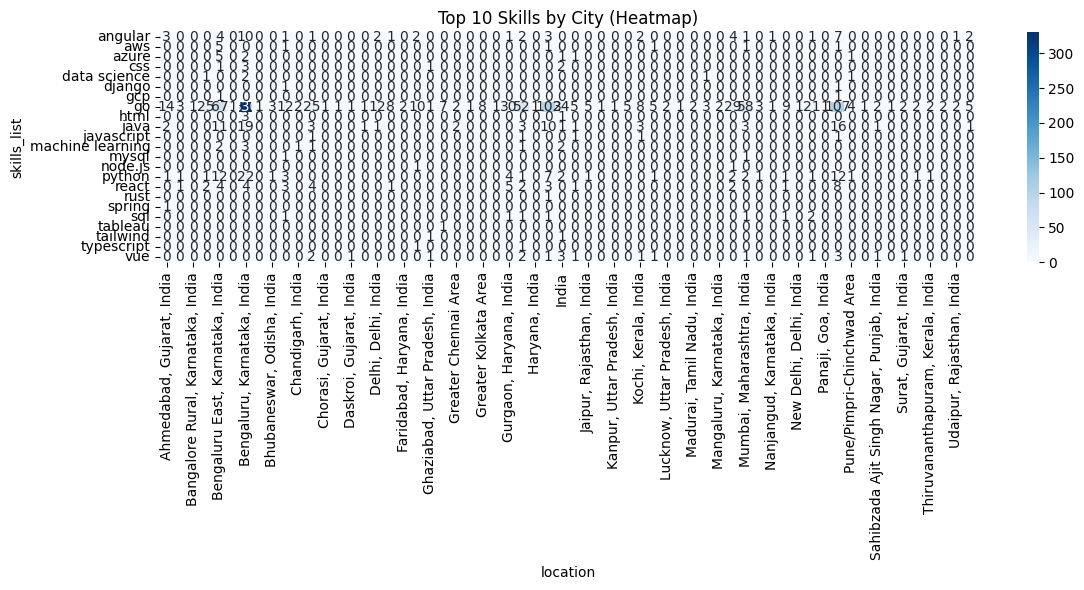

In [29]:
# Heatmap (Pivot table)
pivot = top_skills_by_city.pivot(index='skills_list', columns='location', values='count').fillna(0)

plt.figure(figsize=(12, 6))
sns.heatmap(pivot, cmap="Blues", annot=True, fmt=".0f")
plt.title("Top 10 Skills by City (Heatmap)")
plt.tight_layout()
plt.show()

# -----------------------------
# 3. Skill vs Role Matrix
# -----------------------------
skill_role_matrix = (
    skills_df.groupby(['title', 'skills'])
    .size()
    .reset_index(name='count')
    .pivot(index='skills', columns='title', values='count')
    .fillna(0)
)


C:\Users\RITHIK\AppData\Local\Temp\ipykernel_31516\2026126186.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_skills.values, y=top_skills.index, palette="viridis")


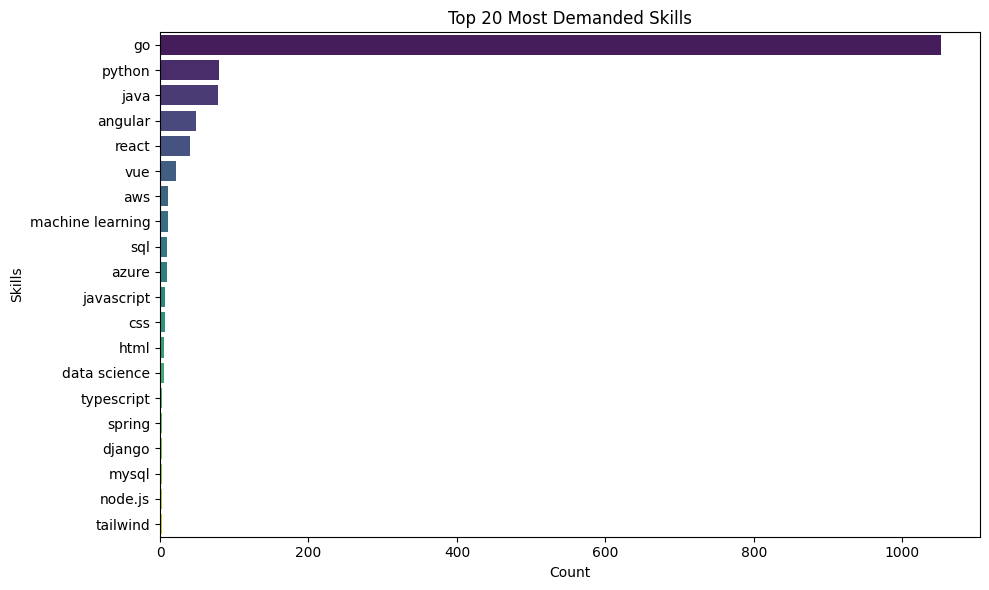

In [30]:
# Top 20 Most Demanded Skills
top_skills = (
    skills_df['skills_list'].value_counts().head(20)
)

plt.figure(figsize=(10,6))
sns.barplot(x=top_skills.values, y=top_skills.index, palette="viridis")
plt.title("Top 20 Most Demanded Skills")
plt.xlabel("Count")
plt.ylabel("Skills")
plt.tight_layout()
plt.show()


C:\Users\RITHIK\AppData\Local\Temp\ipykernel_31516\3929114804.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_counts.values, y=city_counts.index, palette="mako")


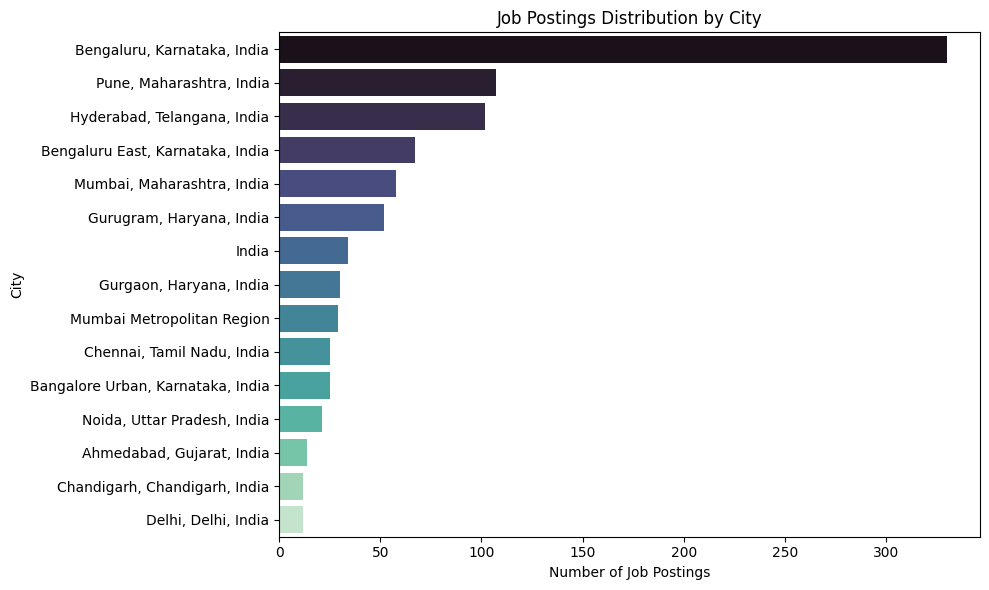

In [31]:
# (b) Job Postings Distribution by City
city_counts = df['location'].value_counts().head(15)

plt.figure(figsize=(10,6))
sns.barplot(x=city_counts.values, y=city_counts.index, palette="mako")
plt.title("Job Postings Distribution by City")
plt.xlabel("Number of Job Postings")
plt.ylabel("City")
plt.tight_layout()
plt.show()

In [32]:
# Save outputs to Excel
output_file = "D:/RITHIK/Project/Project_phase/linkedin_jobs_analysis_output.xlsx"
with pd.ExcelWriter(output_file, engine='openpyxl') as writer:
    df.to_excel(writer, sheet_name="Raw Data", index=False)
    top_skills_by_city.to_excel(writer, sheet_name="Top Skills by City", index=False)
    pivot.to_excel(writer, sheet_name="Heatmap Data")
    skill_role_matrix.to_excel(writer, sheet_name="Skill vs Role Matrix")

## Conclusion
The LinkedIn Job Trend Analysis project successfully identified skill demand trends across various cities and roles.  
The results provide a clear picture of which skills are most valued in the job market, helping professionals make informed career decisions.  

Future improvements may include:  
- Integrating real-time data pipelines  
- Expanding the scope to global job postings  
- Automating dashboard refresh with live data 
